In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [32]:
df = pd.read_csv("data.csv")

In [33]:
df.head(1)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN


In [34]:
df.shape

(11251, 15)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [36]:
df.drop(["Status", "unnamed1"], axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [38]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [41]:
df.shape

(11239, 13)

In [42]:
df["Amount"] = df["Amount"].astype("int")

In [43]:
df["Amount"].dtype

dtype('int32')

In [44]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [45]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


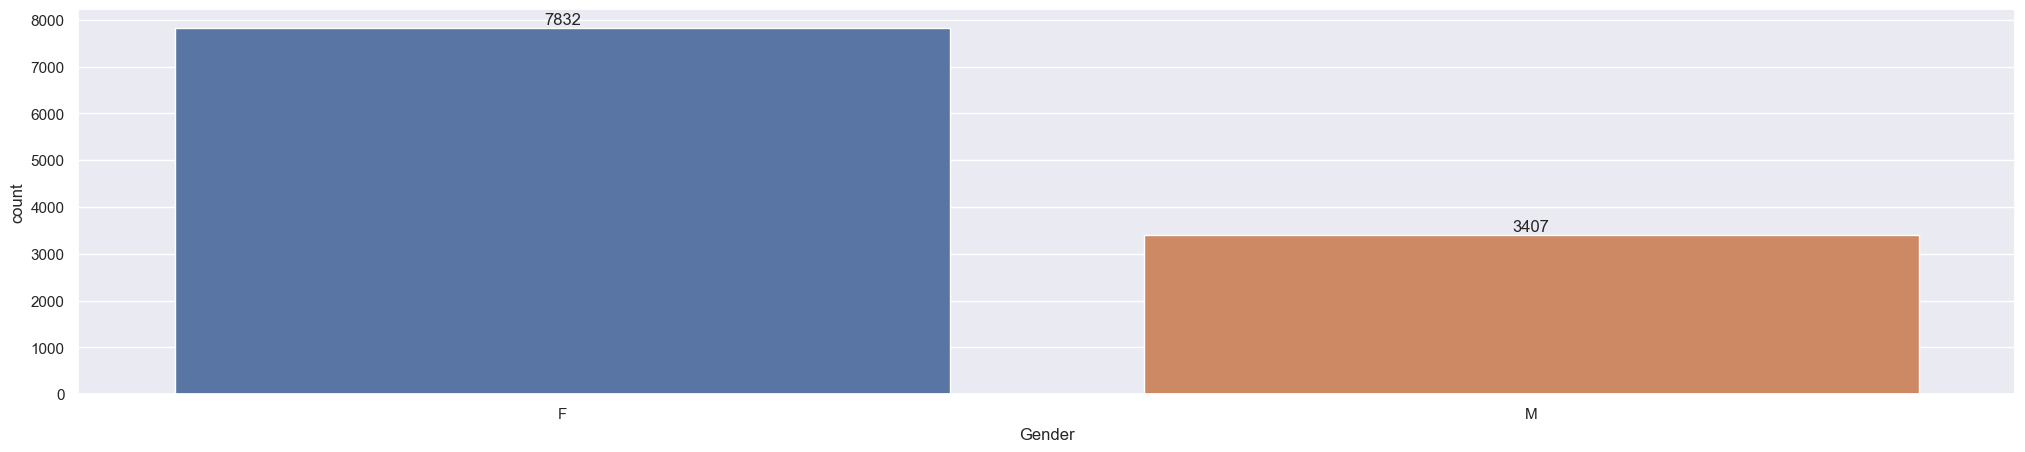

In [46]:
gender_count = sb.countplot(x="Gender", data=df)

for i in gender_count.containers:
    gender_count.bar_label(i)

*In the above graph, we can see that females did more shopping than males*

<Axes: xlabel='Gender', ylabel='Amount'>

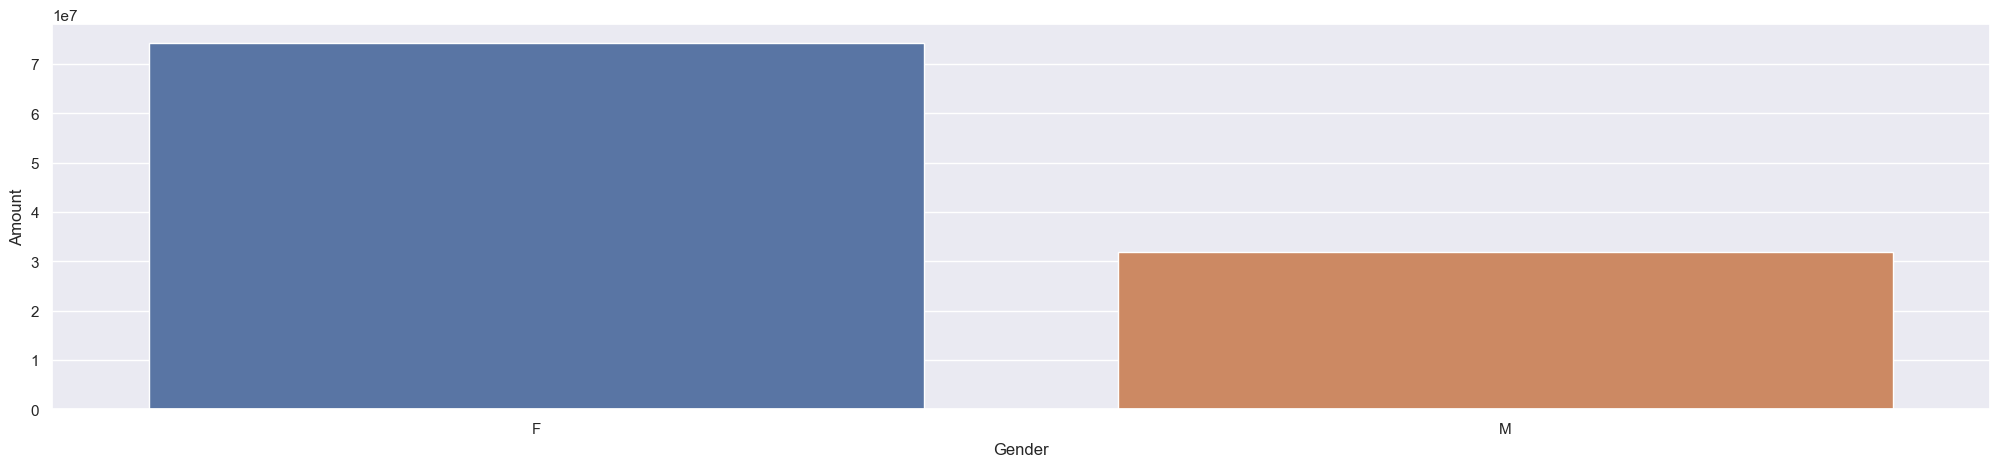

In [47]:
sales_by_gender = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sb.barplot(x="Gender", y="Amount", data=sales_by_gender)

*In the above graph, we can see that women spend more on shopping than men*

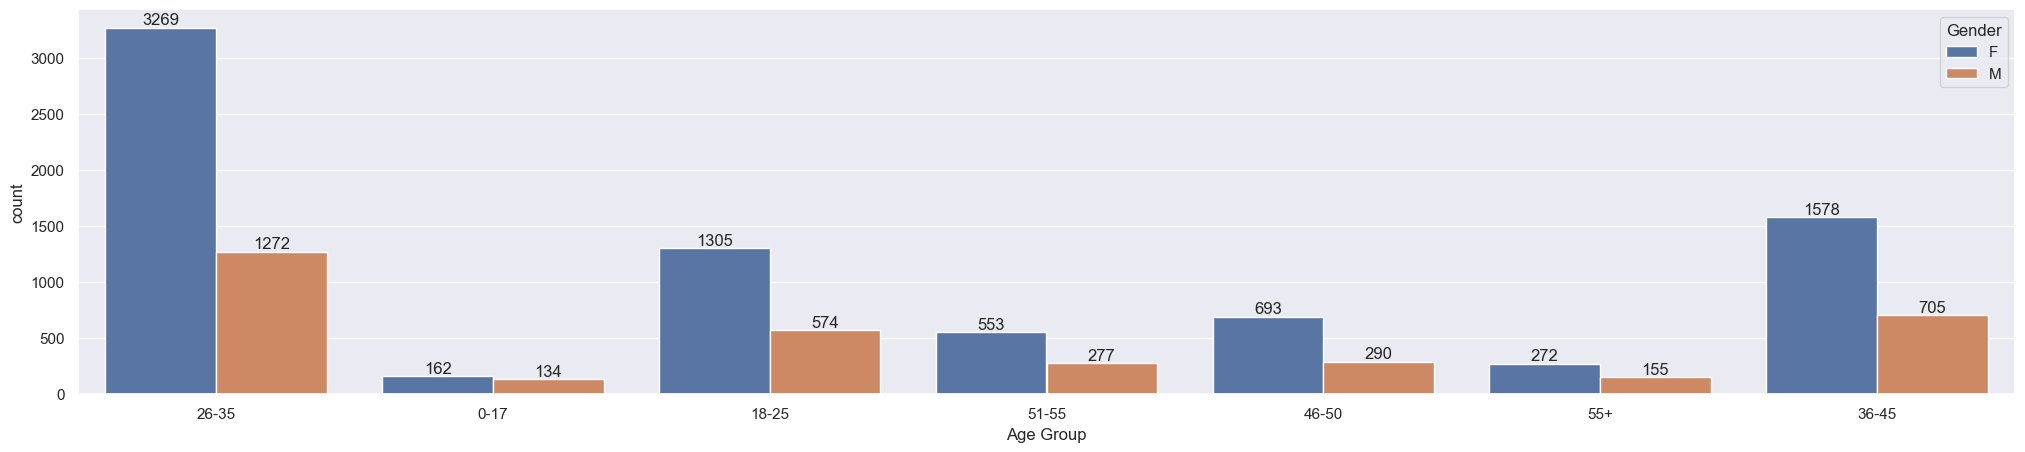

In [48]:
age_group_by_gender = sb.countplot(data=df, x="Age Group", hue="Gender")

for i in age_group_by_gender.containers:
    age_group_by_gender.bar_label(i)

*The graph shows different group ages with both genders*

<Axes: xlabel='Age Group', ylabel='Amount'>

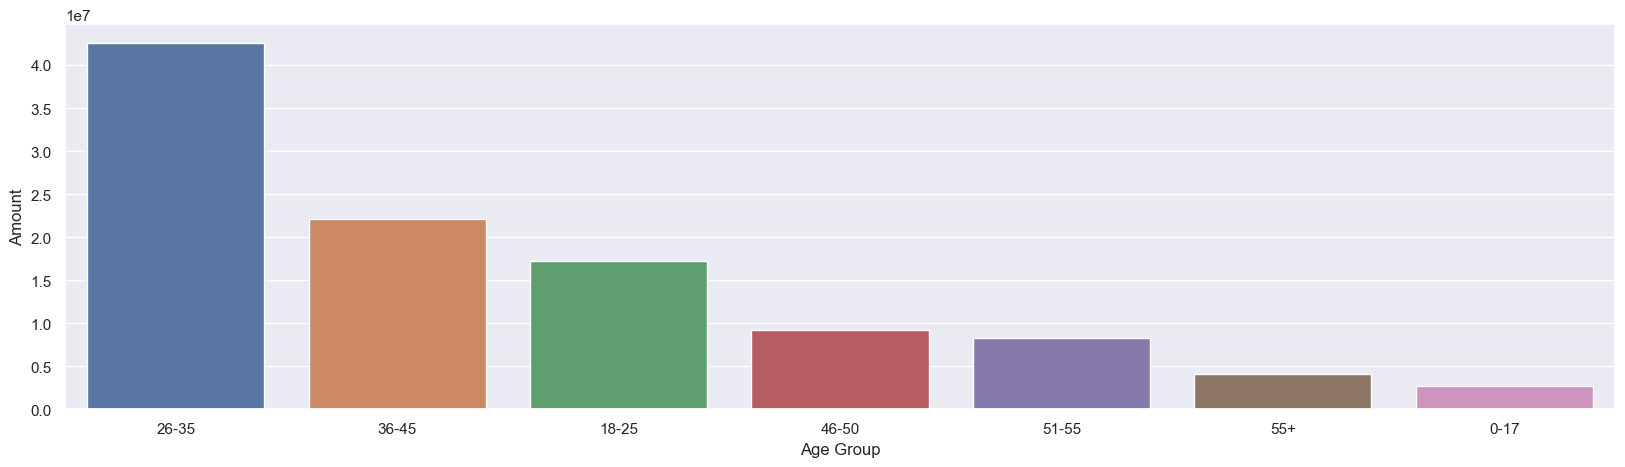

In [101]:
sales_by_age = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sb.barplot(x="Age Group", y="Amount", data=sales_by_age)

*From the above graph, it is clear that people from the age group of 26-35 spend more than the rest. The least eas spend by people of 0-17 age groups.*

<Axes: xlabel='State', ylabel='Orders'>

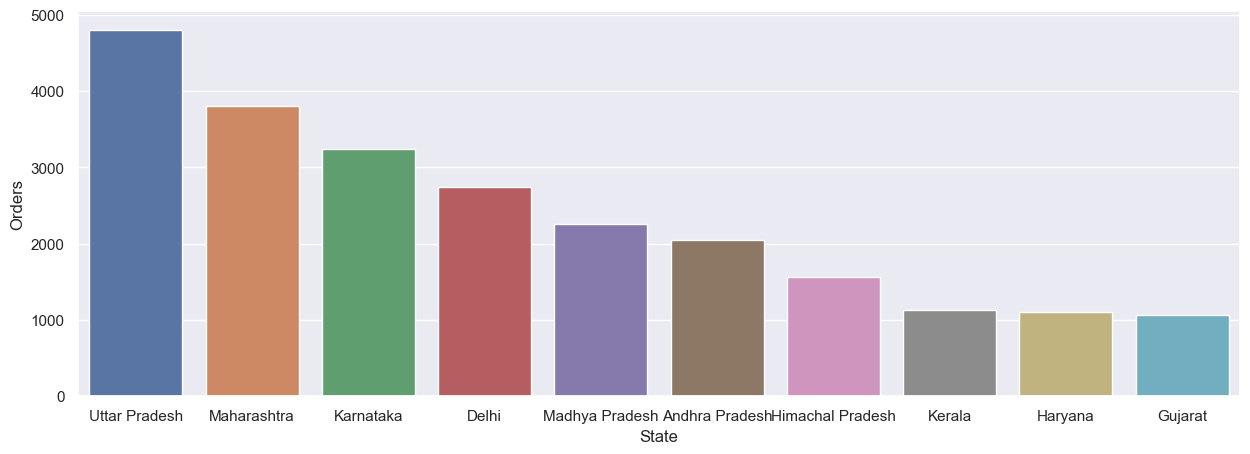

In [50]:
sales_by_state = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

sb.set(rc={"figure.figsize": (15, 5)})
sb.barplot(data=sales_by_state, x="State", y="Orders")

*The above graph shows the state wise orders. Utter Pradesh holds the first position.*

<Axes: xlabel='State', ylabel='Amount'>

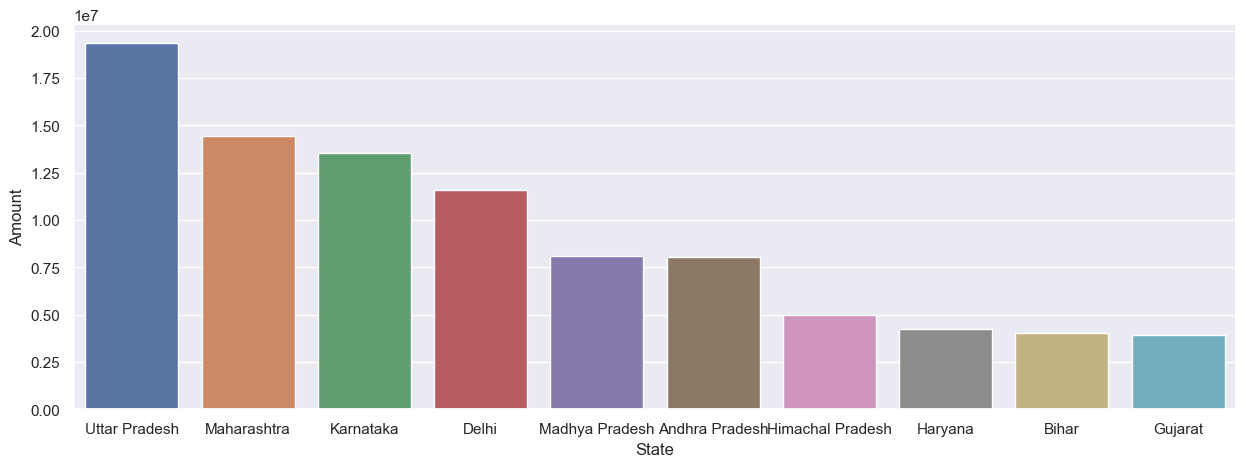

In [21]:
sales_by_state_amount = data.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

sb.set(rc={"figure.figsize": (15, 5)})
sb.barplot(data=sales_by_state_amount, x="State", y="Amount")

*The above graph shows the state wise spenditure. Utter Pradesh holds the first position.*

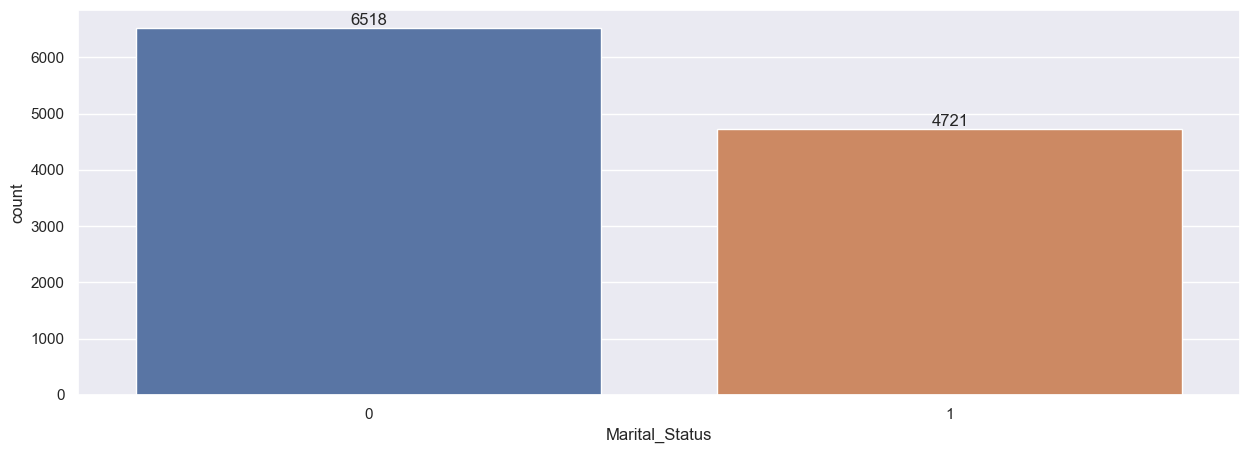

In [51]:
marital_status = sb.countplot(data=df, x="Marital_Status")

sb.set(rc={"figure.figsize": (5, 5)})

for i in marital_status.containers:
    marital_status.bar_label(i)

*Married women spend more than married man*

<Axes: xlabel='Marital_Status', ylabel='Amount'>

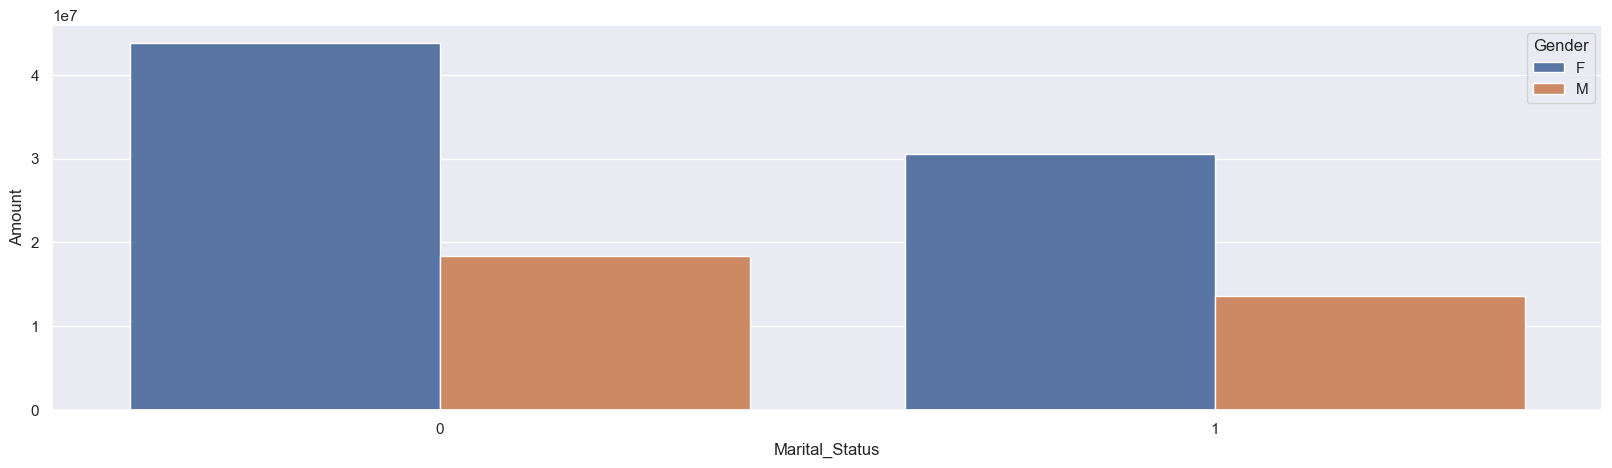

In [106]:
sales_by_marital = df.groupby(["Marital_Status", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sb.barplot(x="Marital_Status", y="Amount", data=sales_by_marital, hue="Gender")

*From the abbove graph, it is clear that both married and unmarried femals spend more than married and unmarried males. Overall, women spned more than man in both categories.*

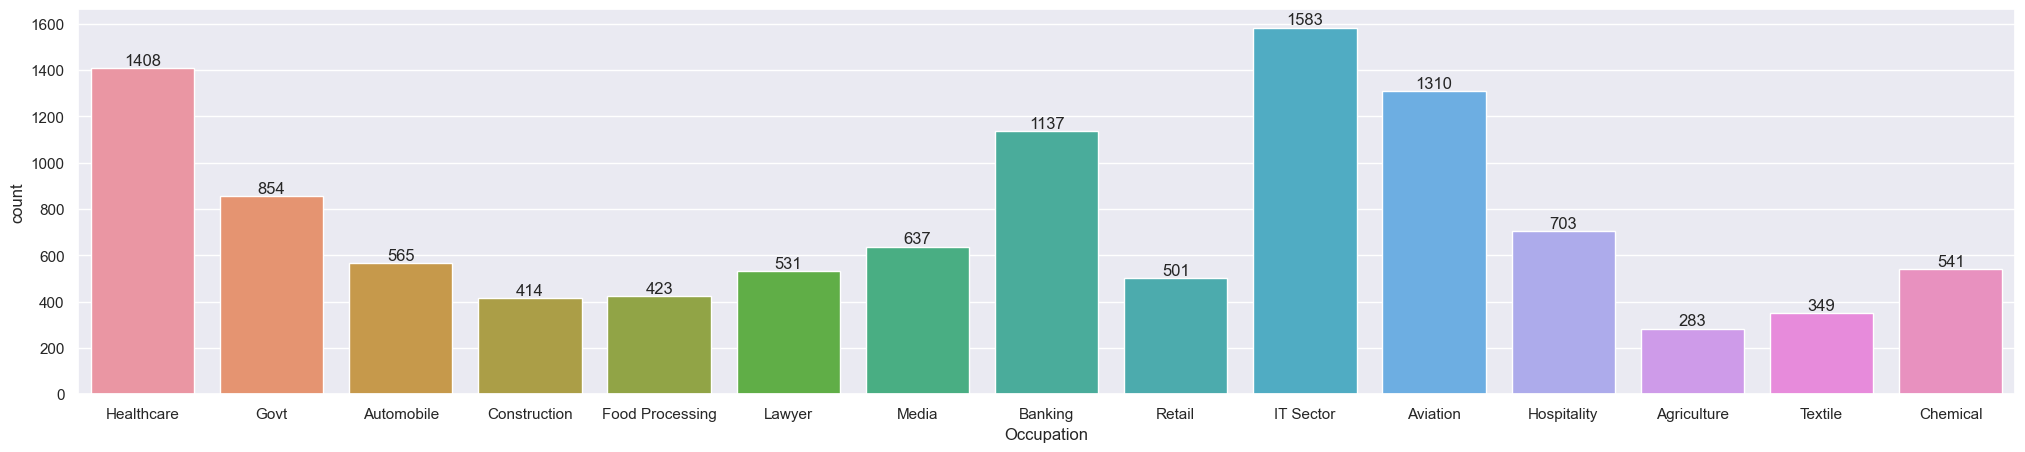

In [71]:
occupation = sb.countplot(data=df, x="Occupation")

sb.set(rc={"figure.figsize": (25, 5)})

for i in occupation.containers:
    occupation.bar_label(i)

*The graph demonstrates the numebr of people form different sectors.*

<Axes: xlabel='Occupation', ylabel='Amount'>

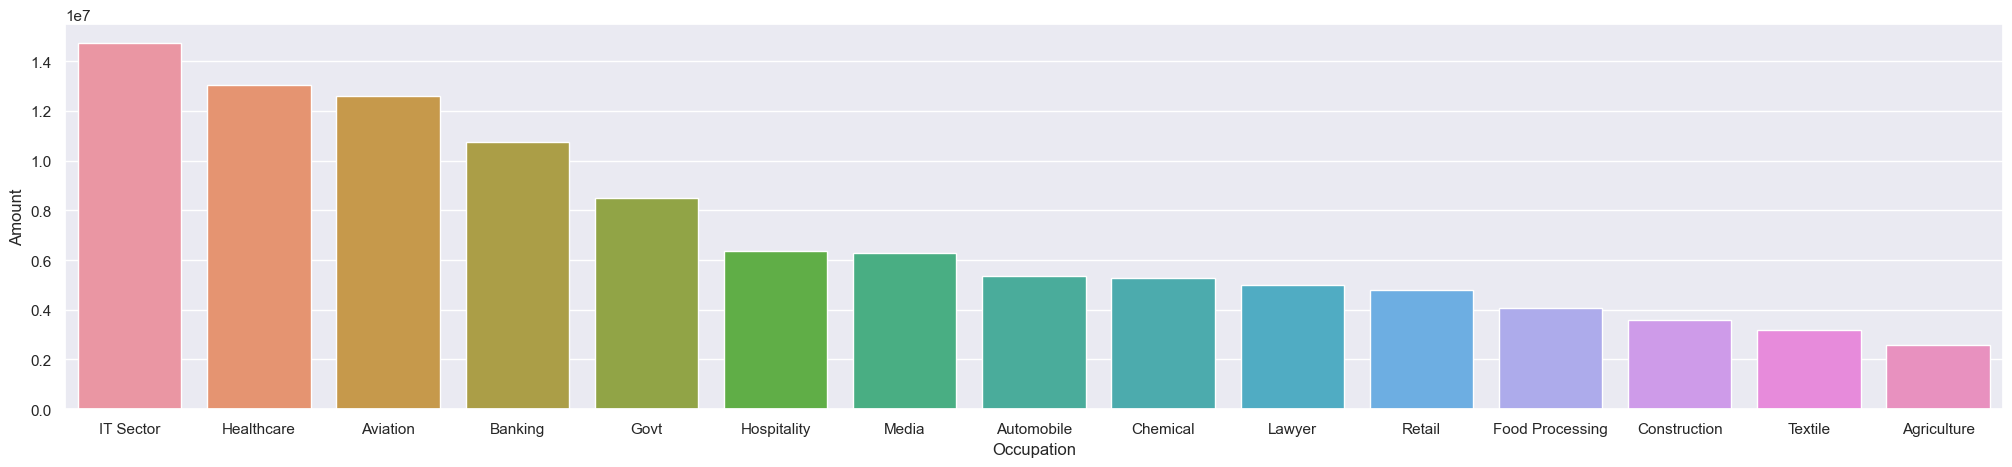

In [72]:
sales_by_occupation = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

sb.barplot(x="Occupation", y="Amount", data=sales_by_occupation)

*The graph demonstrates the spenditure of different sectors.*

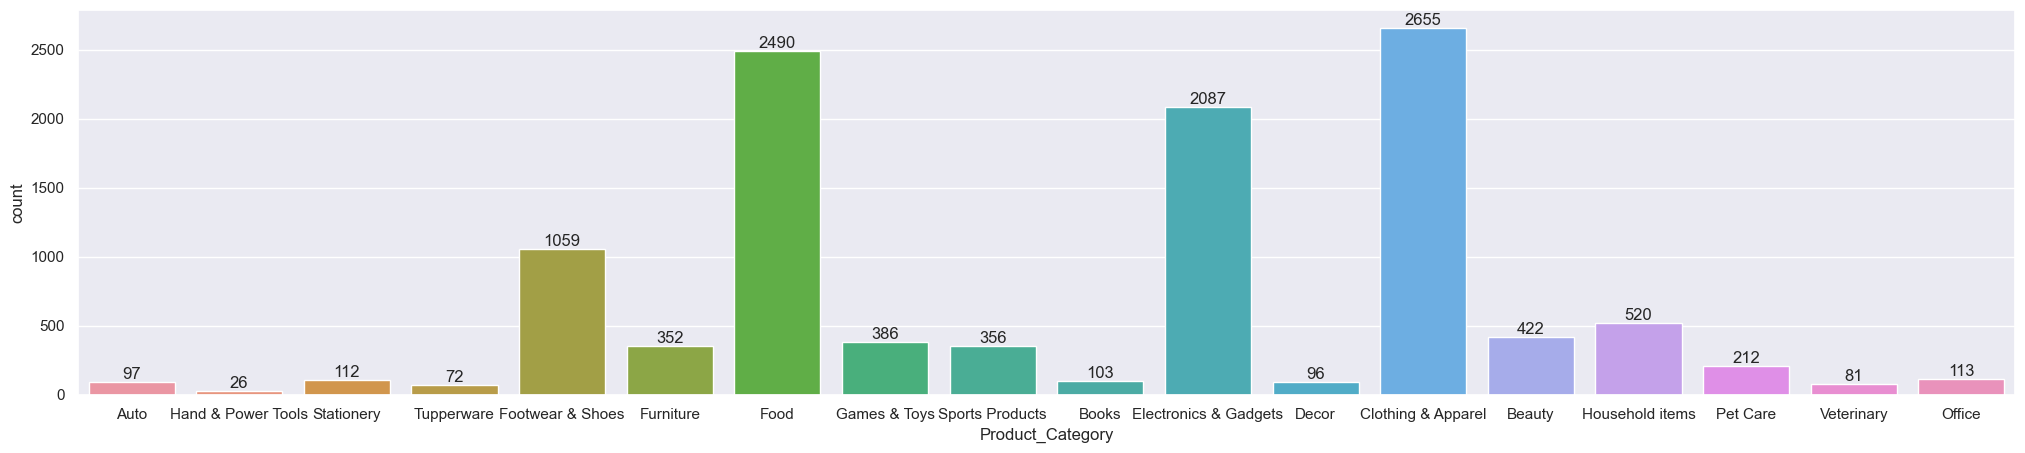

In [73]:
product_category = sb.countplot(data=df, x="Product_Category")

for i in product_category.containers:
    product_category.bar_label(i)

*The graph shows the different product categories on which people like to spend.*

<Axes: xlabel='Product_Category', ylabel='Amount'>

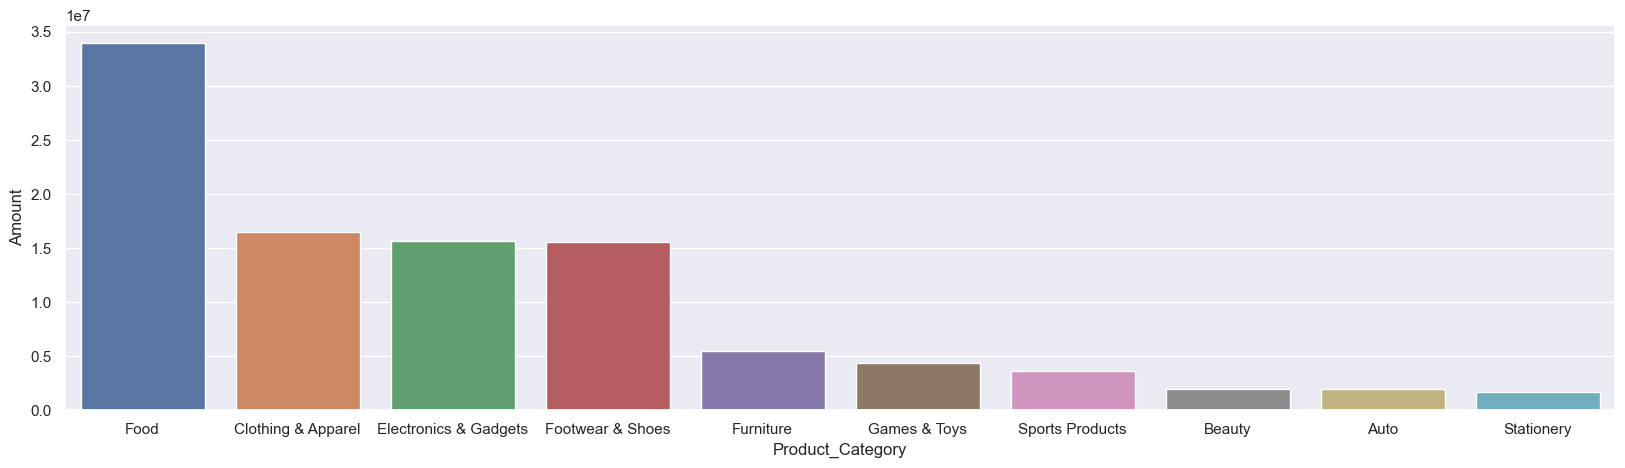

In [91]:
sales_by_product = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)

sb.set(rc={"figure.figsize": (20, 5)})

sb.barplot(x="Product_Category", y="Amount", data=sales_by_product)

*The graph  represents the amount spedn on different categories.*

<Axes: xlabel='Product_ID', ylabel='Orders'>

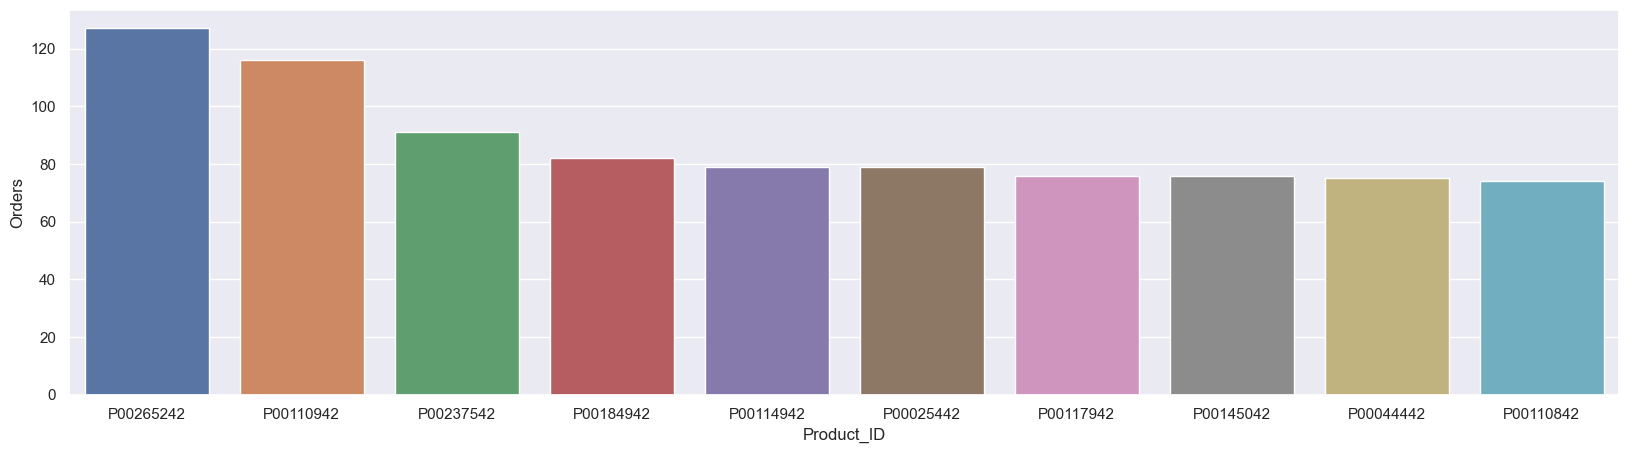

In [93]:
sales_by_state_order = df.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False).head(10)

sb.barplot(x="Product_ID", y="Orders", data=sales_by_state_order)

*The graph shows different products based on the numebr os orders.*

<Axes: xlabel='Product_ID'>

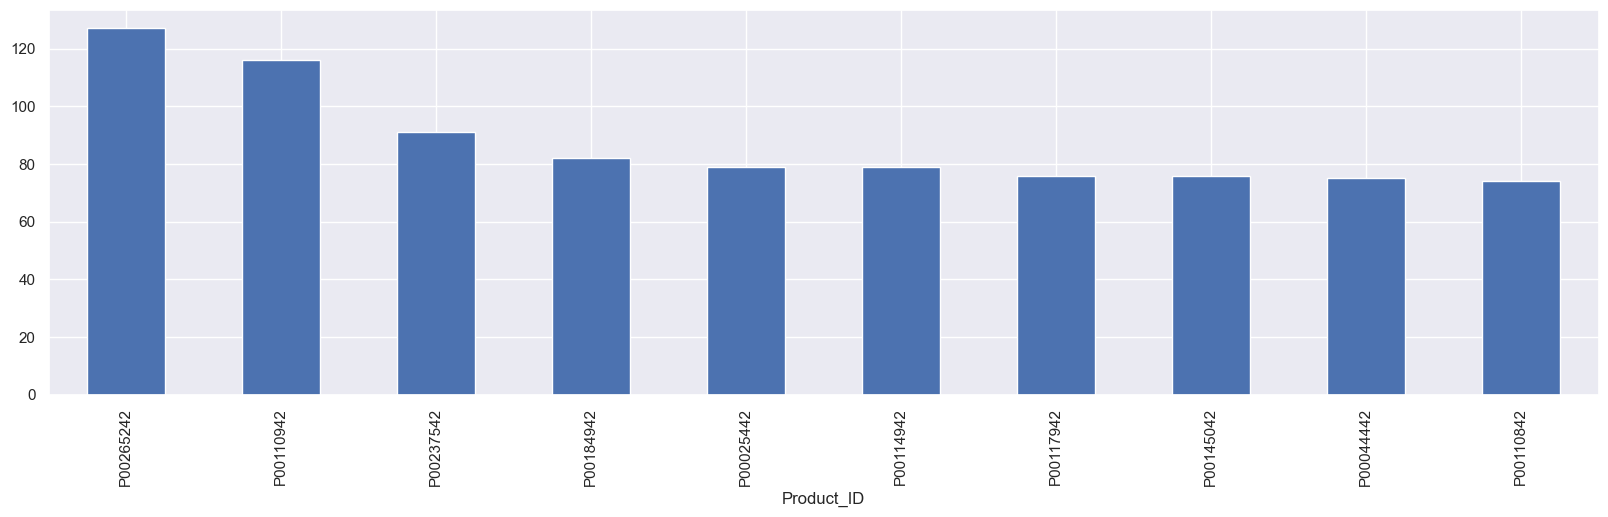

In [95]:
fig1, ax1 = plt.subplots(figsize=(20, 5))

df.groupby("Product_ID")["Orders"].sum().nlargest(10).sort_values(ascending=False).plot(kind="bar")

*The graph shows different products based on the numebr os orders.*